# Build Resistance Toy Model

Inspect the impact of shifting cathode stoichiometry on the decrease in low-SOC resistance using a toy model.

Created: 2021/06/08
Author:  Andrew Weng

- 6/19/2021
  - included plot of voltage curves before formation
  - focus plots in low SOC regions
  - expanded resistance covers to cover negative capacity values

In [1]:
import os, sys

if os.path.basename(os.getcwd()) == 'code-base':
    os.chdir('../')
sys.path.append('code-base')

import numpy as np
import pandas as pd
import json

from scipy import interpolate
from matplotlib import pyplot as plt

from src.formation import FormationCell
from src.utils import get_label_registry

import warnings
warnings.filterwarnings('ignore')

assert os.path.basename(os.getcwd()) == 'project-formation'

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

## Configure plot settings

In [3]:
# Configure plot settings
plt.rc('font', **{'family'     : 'sans-serif',
                  'sans-serif' : ['Arial'],
                  'size': 18
                  })
plt.rc('figure', **{'autolayout' : True,
                    'figsize'    : (7, 5),
                    'facecolor'  : 'white',
                    'dpi'        : 150
                    })
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes',  labelsize='medium', grid=False)
plt.rc('axes',  titlesize='medium')
plt.rc('legend', fontsize='medium')


## Configure globals

In [4]:
# Formation types
CELL_BASE = 25
CELL_FAST = 33
COLOR_BASE = np.array([0, 0, 0])
COLOR_FAST = np.array([44, 121, 245])/255
COLOR_FAST_RT = np.array([0, 0, 1])
COLOR_FAST_HT = np.array([1, 0, 0])
LINESTYLE_BASE = ':'
LINESTYLE_FAST = '-'

# Pos/neg electrode colors
COLOR_POS = np.array([0, 0, 1])
COLOR_NEG = np.array([1, 0, 0])
COLOR_FULL = np.array([0, 0, 0])

COLOR_BG = (0.2, 0.2, 0.2)
COLOR_REF = (0.7, 0.7, 0.7)

NOMINAL_CAPACITY_AH = 2.36
CAPACITY_LIMITS_AH = (0.8, 2.4)
TARGET_RETENTION = 0.7

figsize = (9, 5.5)

## Process data before formation
- reference `src/plot_voltage_curves_before_formation.m` for the generation process

(0.0, 4.5)

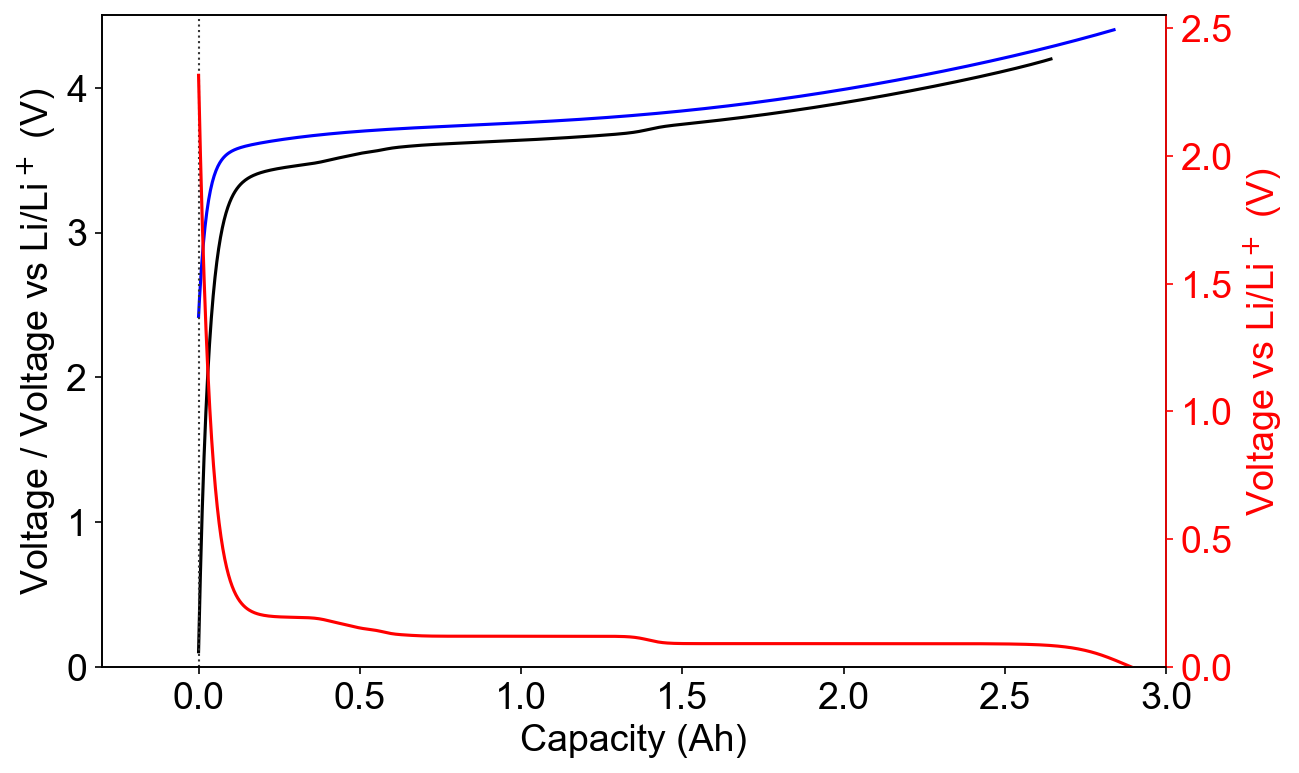

In [5]:
file_name_voltage_data_before_formation = 'output/voltage_curves_before_formation.json'

with open(file_name_voltage_data_before_formation) as f:
    data = json.load(f)
    

fig, ax = plt.subplots(figsize=figsize)
ax2 = ax.twinx()

ax.plot(data['q_pos'], data['v_pos'], color=COLOR_POS, linestyle='-')
ax.plot(data['q_full'], data['v_full'], color=COLOR_FULL, linestyle='-')
ax2.plot(data['q_neg'], data['v_neg'], color=COLOR_NEG, linestyle='-')

ax.plot([0, 0], [0, 4.5], color=COLOR_BG, linestyle=':', linewidth=1)

ax.set_xlabel('Capacity (Ah)')
ax2.yaxis.label.set_color(COLOR_NEG)
ax2.spines["right"].set_edgecolor(COLOR_NEG)
ax2.tick_params(axis='y', colors=COLOR_NEG)

ax.set_ylabel('Voltage / Voltage vs Li/Li$^+$ (V)')
ax2.set_ylabel('Voltage vs Li/Li$^+$ (V)')
ax.set_xlim((-0.3, 3))
ax2.set_ylim((0, 2.55))
ax.set_ylim((0, 4.5))


## Process data from the formation tests

In [6]:
cell_dict = dict()
cellid_list = np.arange(1, 41)

for cellid in cellid_list:
    cell_dict[cellid] = FormationCell(cellid)

In [7]:
summary_stats = cell_dict[CELL_FAST].get_formation_test_summary_statistics()
q_lli_ah_ref = summary_stats['form_first_charge_capacity_ah'] - summary_stats['form_final_discharge_capacity_ah']

In [8]:
# Data from cells
df_hppc_1 = cell_dict[CELL_FAST].process_diagnostic_hppc_data()[0]['data']
df_hppc_3 = cell_dict[CELL_BASE].process_diagnostic_hppc_data()[0]['data']

esoh_data_1 = cell_dict[CELL_FAST].get_esoh_fitting_data()[0]
esoh_data_2 = cell_dict[CELL_FAST].get_esoh_fitting_data()[2]
esoh_data_3 = cell_dict[CELL_BASE].get_esoh_fitting_data()[0]
esoh_data_4 = cell_dict[CELL_BASE].get_esoh_fitting_data()[3]

In [9]:
esoh_data_1

{'Xt': [0.037883451128220065,
  2.7397734876546456,
  0.9215329900783027,
  2.734355150767673,
  0],
 'np_ratio': 0.9980223412952247,
 'Cp': 2.7397734876546456,
 'Cn': 2.734355150767673,
 'y100': 0.037883451128220065,
 'y0': 0.9503676441700686,
 'x0': 0.007240638809257627,
 'x100': 0.9215329900783027,
 'n_li': 0.09789009681257853,
 'Cn_excess': 0.31999999999999895,
 'Cp_excess': 0.14,
 'Cf': 2.5,
 'RMSE_mV': 21.222650430687867,
 'Cn_pf': 2.856611694459834,
 'x100_pf': 0.8899732327694092,
 'ful': {'Q': [0,
   0.01,
   0.02,
   0.03,
   0.04,
   0.05,
   0.06,
   0.07,
   0.08,
   0.09,
   0.1,
   0.11,
   0.12,
   0.13,
   0.14,
   0.15,
   0.16,
   0.17,
   0.18,
   0.19,
   0.2,
   0.21,
   0.22,
   0.23,
   0.24,
   0.25,
   0.26,
   0.27,
   0.28,
   0.29,
   0.3,
   0.31,
   0.32,
   0.33,
   0.34,
   0.35000000000000003,
   0.36,
   0.37,
   0.38,
   0.39,
   0.4,
   0.41000000000000003,
   0.42,
   0.43,
   0.44,
   0.45,
   0.46,
   0.47000000000000003,
   0.48,
   0.49,
   0.5,

In [10]:
INTERP_KIND = 'linear' # try 'linear', 'cubic', 'quadratic'

# Unpack the data
capacity = df_hppc_1['capacity']
soc = capacity / np.max(capacity) * 100

# Build a higher fidelity, smooth signal for the toy model
resistance = df_hppc_1['resistance_10s_ohm']
capacity_hifi = np.linspace(np.min(capacity), np.max(capacity), 300)
interp_fn = interpolate.interp1d(capacity, resistance, kind=INTERP_KIND)
resistance_hifi = interp_fn(capacity_hifi)
soc_hifi = capacity_hifi / np.max(capacity_hifi) * 100

In [11]:
def compute_resistance_curves(capacity_vec, resistance_vec, frac_cathode_rct, capacity_shift_ah,
                              resistance_growth_rate, adjust_for_resistance_change=False):
    """
    Create a data set consisting of pos, neg, and full cell resistance curves
    
    Parameters
    ---------
    capacity_vec (np.array)
      vector of capacity for full cell
      
    resistance_vec (np.array)
      vector of resistance for full cell in Ohms
      
    frac_cathode_rct (0-1)
      fraction of total measured resistance attributed to cathode charge tranfser
      
    capacity_shift_ah (float)
      capacity corresponding to extra lithium lithium lost to SEI during formation
    
    resistance_growth_rate (float)
      SEI resistance growth per Ah of Li
      
    adjust_for_resistance_change (boolean)
      if true then will make an additional adjustment to the curve to account for
      intrinsic resistance growth
      
    
    Outputs
    ---------
    a dictionary containing:
    
      capacity_expanded
        an updated capacity vector that matches the dimensions of the shifted resistances
        
      resistance_full_modeled
        modeled full cell resistance after shifting (Ohms)
        
      resistance_cathode_rct
        modeled cathod charge transfer resistance (Ohms)
        
      resistance_other
        modeled 'other' resistance (Ohms)
        
    
    Invariants
    ---------
    
    resistance_other + resistance_cathode_rct_shifted = resistance_full_modeled
    
    """
        
    # Definition of "base" resistance
    capacity_threshold = 1 
    resistance_base = np.min(resistance_vec[capacity_vec < capacity_threshold])

    # Reference resistance (intermediate step for constructing cathode resistance)
    resistance_ref = (1 - frac_cathode_rct) * resistance_base * np.ones(np.size(resistance_vec))
    
    # Construct the cathode charge transfer resistance curve
    resistance_cathode_rct = resistance_vec - resistance_ref
    resistance_cathode_rct[capacity_vec > capacity_threshold] = \
       resistance_cathode_rct[capacity_vec <= capacity_threshold][-1]

    # Definition of R_other
    resistance_other = resistance_vec - resistance_cathode_rct

    # Define shifted cathode charge transfer resistance

    # Shifting the resistance curve!
    
    # Expand the the capacity vector to include negative values
    cap_vec_min = np.min(capacity_vec) - capacity_shift_ah
    cap_vec_max = np.max(capacity_vec)
    cap_vec_diff = np.diff(capacity_vec)[0]
    
    capacity_vec_expanded = np.arange(cap_vec_min, cap_vec_max + cap_vec_diff, cap_vec_diff)
    
    fn = interpolate.interp1d(capacity_vec, resistance_cathode_rct, 
                              kind='linear', fill_value='extrapolate')
    
    resistance_cathode_rct_shifted = fn(capacity_vec_expanded + capacity_shift_ah)
    
    fn2 = interpolate.interp1d(capacity_vec, resistance_other, kind='linear', fill_value='extrapolate')
    
    resistance_other_expanded = fn2(capacity_vec_expanded)
    
    if adjust_for_resistance_change:        
        # Attribute the resistance growth to the anode (but it could come from either, it doesn't matter)
        resistance_other += resistance_growth_rate * capacity_shift_ah
        
    # Calculated the shifted full cell resistance
    resistance_full_modeled = resistance_other_expanded + resistance_cathode_rct_shifted
    
    # Assert invariants hold
    assert np.all(resistance_cathode_rct_shifted + resistance_other_expanded == resistance_full_modeled)
    
    output = dict()
    output['resistance_full_modeled'] = resistance_full_modeled
    
    output['capacity_expanded'] = capacity_vec_expanded
    output['resistance_cathode_rct'] = resistance_cathode_rct_shifted
    output['resistance_other'] = resistance_other_expanded
    
    return output

### Initialize the dataset to plot

In [12]:
# Define the horizontal leftward cathode capacity shift for this toy model demonstration
capacity_shift_ah = 0.1
capacity_shift_ah = np.array(capacity_shift_ah)

capacity_at_5_soc = 0.05 * np.max(capacity_hifi)

q_pos = esoh_data_1['pos']['Q']
q_neg = esoh_data_1['neg']['Q']
v_pos = esoh_data_1['pos']['V']
v_neg = esoh_data_1['neg']['V']
q_full = esoh_data_1['orig']['Q']
v_full = esoh_data_1['orig']['V']

# Percentage of total cell resistance attributed to the cathode charge transfer resistance
frac_cathode_rct = 0.7

# Fast formation
fast = compute_resistance_curves(capacity_hifi, resistance_hifi, 
                                   frac_cathode_rct, capacity_shift_ah, 0, False)

# Baseline formation
base = compute_resistance_curves(capacity_hifi, resistance_hifi, 
                                     frac_cathode_rct, 0, 0, False)


### Make the plot of voltage curve alignment 
Compare between baseline and fast formation

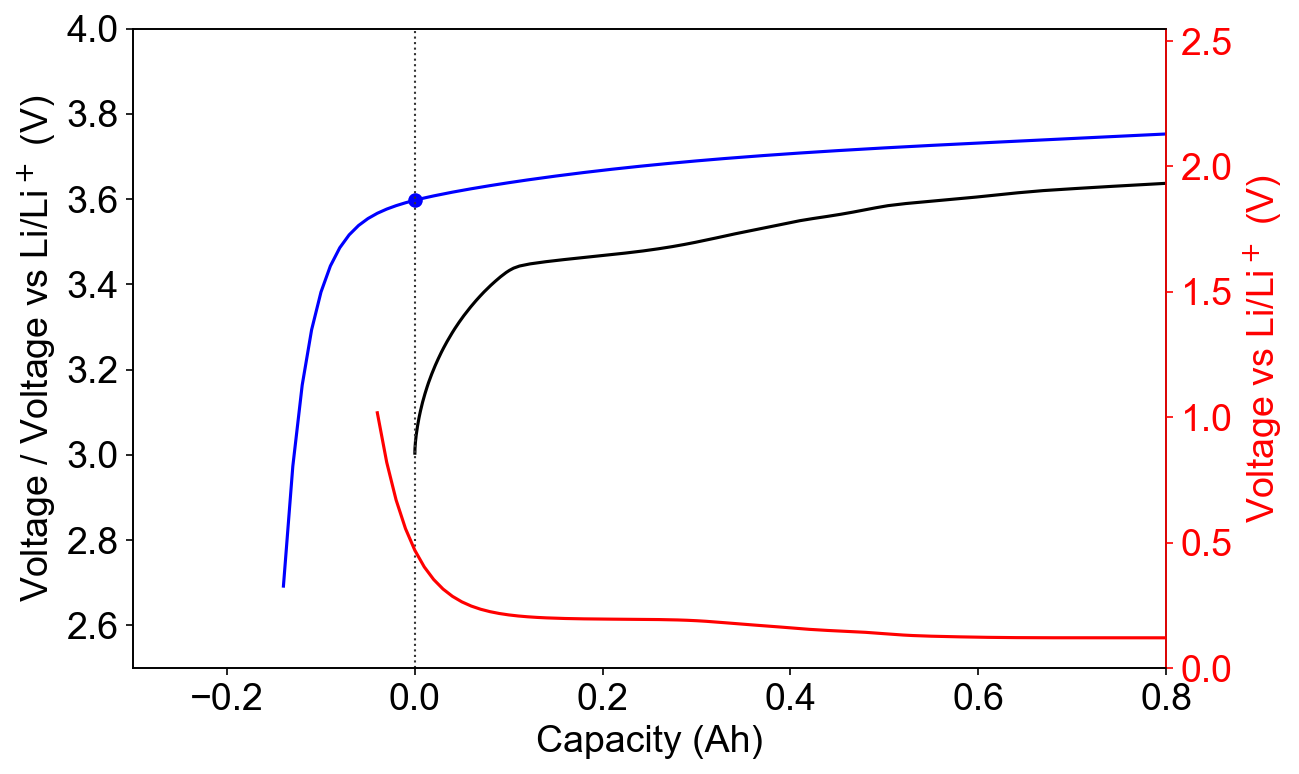

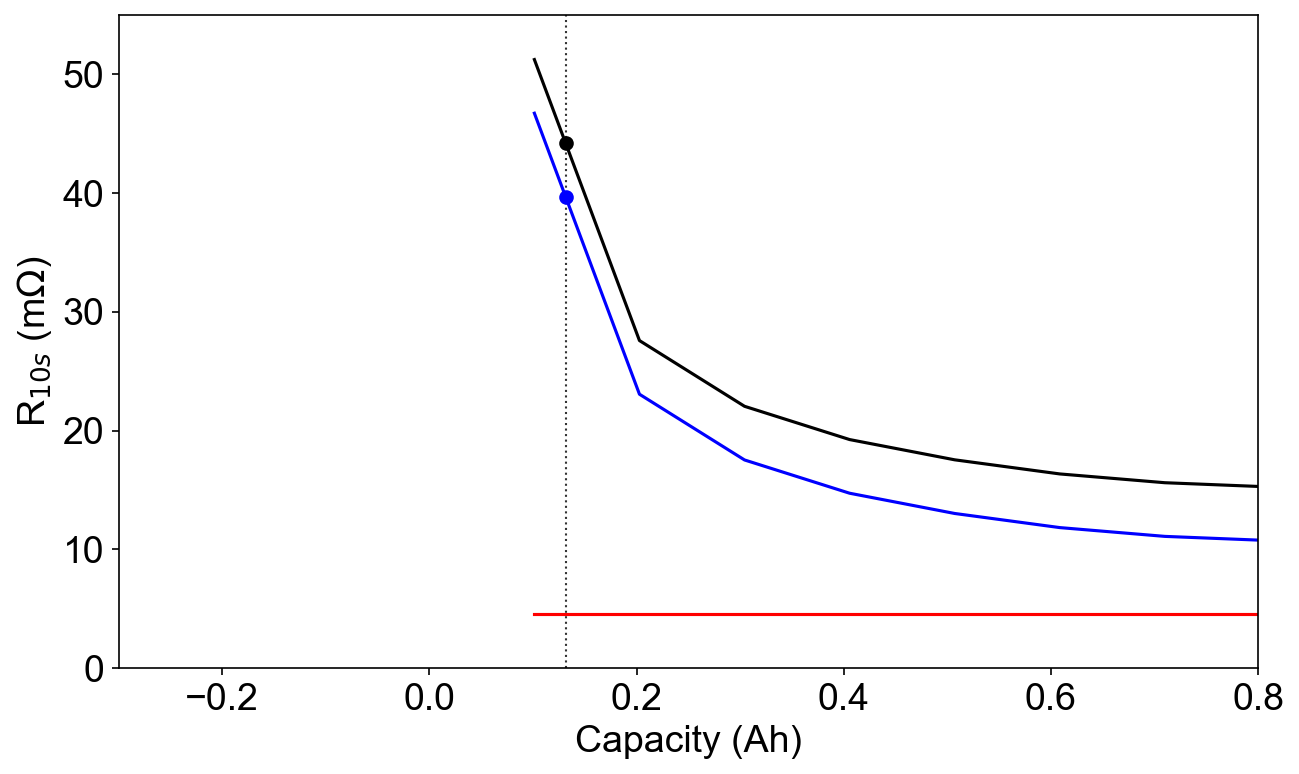

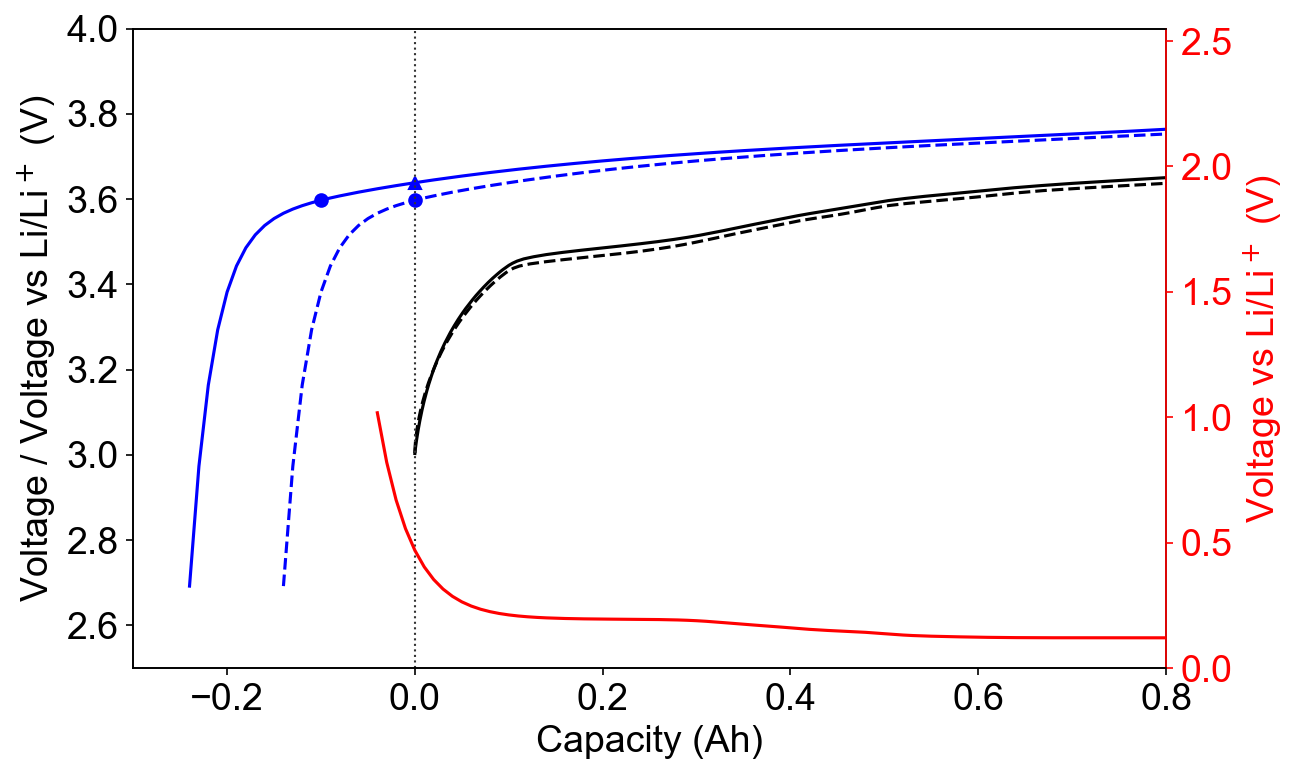

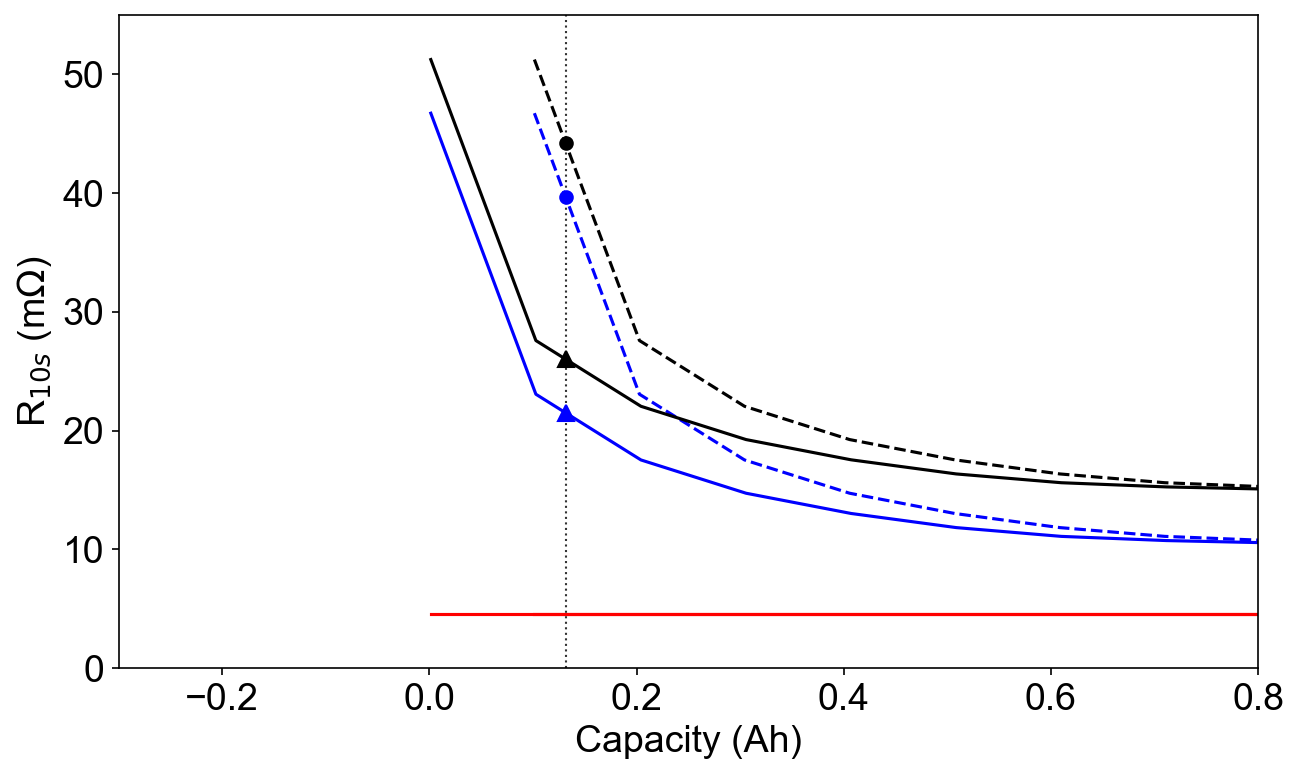

In [13]:
for include_fast in [False, True]:
    
    ls_base = '--' if include_fast else '-'
    
    fig_arr, ax_arr, ax2_arr = [], [], []

    ## First plot

    fig, ax = plt.subplots(figsize=figsize)
    ax2 = ax.twinx()

    fig_arr.append(fig)

    ax.plot(q_pos, v_pos, color=COLOR_POS, linestyle=ls_base)
    ax.plot(q_full, v_full, color=COLOR_FULL, linestyle=ls_base)
    ax2.plot(q_neg, v_neg, color=COLOR_NEG)

    if include_fast:
        # The shifted cathode curve
        ax.plot(q_pos - capacity_shift_ah, v_pos, color=COLOR_POS)
        ax.plot(esoh_data_2['orig']['Q'], esoh_data_2['orig']['V'], color=COLOR_FULL)

    # Put markers on the cathode curve at 0% SOC
    if include_fast:
        
        fn = interpolate.interp1d(q_pos, v_pos)
        ax.plot(0, fn(0), marker='o', markersize=6, 
                color=COLOR_POS, linestyle=ls_base)
       
        ax.plot(0 - capacity_shift_ah, fn(0), marker='o', markersize=6, 
                color=COLOR_POS, linestyle=ls_base)
        
        fn = interpolate.interp1d(q_pos - capacity_shift_ah, v_pos)

        ax.plot(0, fn(0), marker='^', markersize=6, 
                color=COLOR_POS, linestyle=ls_base)
        
    else:
        
        fn = interpolate.interp1d(q_pos, v_pos)
        v_pos_at_0_soc = fn(0)
        ax.plot(0, v_pos_at_0_soc, 
                marker='o', color=COLOR_POS, markersize=6)

        

    # Vertical line at 5% SOC
    ax.plot([0] * 2, [2.5, 4.5], color=COLOR_BG, linestyle=':', linewidth=1)

    ax.set_xlabel('Capacity (Ah)')
    ax.set_ylabel('Voltage / Voltage vs Li/Li$^+$ (V)')
    ax.set_xlim((-0.3, 0.8))
    ax.set_ylim((2.5, 4.0))

    ax2.tick_params(axis='y', colors=COLOR_NEG)
    ax2.yaxis.label.set_color(COLOR_NEG)
    ax2.spines["right"].set_edgecolor(COLOR_NEG)
    ax2.set_ylabel('Voltage vs Li/Li$^+$ (V)')
    ax2.set_ylim((0, 2.55))

    ## Second plot
    fig, ax = plt.subplots(figsize=figsize)
    fig_arr.append(fig)

    ax.plot(base['capacity_expanded'], base['resistance_full_modeled'] * 1000,
            color=COLOR_FULL, linestyle=ls_base)

    ax.plot(base['capacity_expanded'], base['resistance_other'] * 1000,
             color=COLOR_NEG)

    ax.plot(base['capacity_expanded'], base['resistance_cathode_rct'] * 1000,
            color=COLOR_POS, linestyle=ls_base)

    if include_fast:

        ax.plot(fast['capacity_expanded'], fast['resistance_other'] * 1000,
                 color=COLOR_NEG)

        ax.plot(fast['capacity_expanded'], fast['resistance_full_modeled'] * 1000, 
                color=COLOR_FULL)

        ax.plot(fast['capacity_expanded'], fast['resistance_cathode_rct'] * 1000,
                color=COLOR_POS)

    # Vertical line at 5% SOC
    ax.plot([capacity_at_5_soc] * 2, [0, 55], color=COLOR_BG, linestyle=':', linewidth=1)

    # Put markers on the cathode and full cell resistance curves at 5% SOC
    fn = interpolate.interp1d(base['capacity_expanded'], base['resistance_full_modeled'])
    r_pos_at_5_soc = fn(capacity_at_5_soc)
    ax.plot(capacity_at_5_soc, r_pos_at_5_soc * 1000, marker='o', color=COLOR_FULL, markersize=6)

    fn = interpolate.interp1d(base['capacity_expanded'], base['resistance_cathode_rct'])
    r_pos_at_5_soc = fn(capacity_at_5_soc)
    ax.plot(capacity_at_5_soc, r_pos_at_5_soc * 1000, marker='o', color=COLOR_POS, markersize=6)

    if include_fast: 

        fn = interpolate.interp1d(fast['capacity_expanded'], fast['resistance_full_modeled'])
        r_pos_at_5_soc = fn(capacity_at_5_soc)
        ax.plot(capacity_at_5_soc, r_pos_at_5_soc * 1000, marker='^', color=COLOR_FULL, markersize=8)

        fn = interpolate.interp1d(fast['capacity_expanded'], fast['resistance_cathode_rct'])
        r_pos_at_5_soc = fn(capacity_at_5_soc)
        ax.plot(capacity_at_5_soc, r_pos_at_5_soc * 1000, marker='^', color=COLOR_POS, markersize=8)

    ax.set_xlabel('Capacity (Ah)')
    ax.set_ylabel('R$_{10s}$ (m$\Omega$)')
    ax.set_xlim((-0.3, 0.8))
    ax.set_ylim(bottom=0, top=55)

In [14]:
FRAC_CATHODE_RCT = 0.7
RESISTANCE_GROWTH_RATE = 0.15 # Ohm / Ah

output_0 = compute_resistance_curves(capacity_hifi, resistance_hifi, FRAC_CATHODE_RCT, 0, True)

capacity_shift_ah_vec = np.linspace(-0.1, 0.1, 100)

resistance_5_soc_vec = []
resistance_5_soc_vec_w_res_growth = []
for capacity_shift_ah in capacity_shift_ah_vec:
    
    output_wo_res_growth = compute_resistance_curves(capacity_hifi, resistance_hifi, 
                                                     FRAC_CATHODE_RCT, capacity_shift_ah, 
                                                     RESISTANCE_GROWTH_RATE, False)
    
    output_w_res_growth = compute_resistance_curves(capacity_hifi, resistance_hifi,
                                                    FRAC_CATHODE_RCT, capacity_shift_ah,
                                                    RESISTANCE_GROWTH_RATE, True)
    
    # The sims don't account for full cell capacity differences, which will skew the SOC definition slightly.
    # So let's make an adjustment for this.
    derating_factor = (np.max(capacity_hifi) - capacity_shift_ah) / np.max(capacity_hifi)
    soc_adjusted = 5 / derating_factor
    
    q = output_wo_res_growth['capacity_expanded']
    soc_vec = q / np.max(q) * 100
    resistance_5_soc_vec.append(np.interp(soc_adjusted, soc_vec,
                                         output_wo_res_growth['resistance_full_modeled']))
    
    q = output_w_res_growth['capacity_expanded']
    soc_vec = q / np.max(q) * 100
    resistance_5_soc_vec_w_res_growth.append(np.interp(soc_adjusted, soc_vec, 
                                                       output_w_res_growth['resistance_full_modeled']))
    
resistance_5_soc_vec = np.array(resistance_5_soc_vec)
resistance_5_soc_vec_w_res_growth = np.array(resistance_5_soc_vec_w_res_growth)

# Compare the real data vs the modeled data

Processing cell 1...
Processing cell 2...
Processing cell 3...
Processing cell 4...
Processing cell 5...
Processing cell 6...
Processing cell 7...
Processing cell 8...
Processing cell 10...
Processing cell 31...
Processing cell 32...
Processing cell 33...
Processing cell 34...
Processing cell 35...
Processing cell 36...
Processing cell 37...
Processing cell 38...
Processing cell 39...
Processing cell 40...


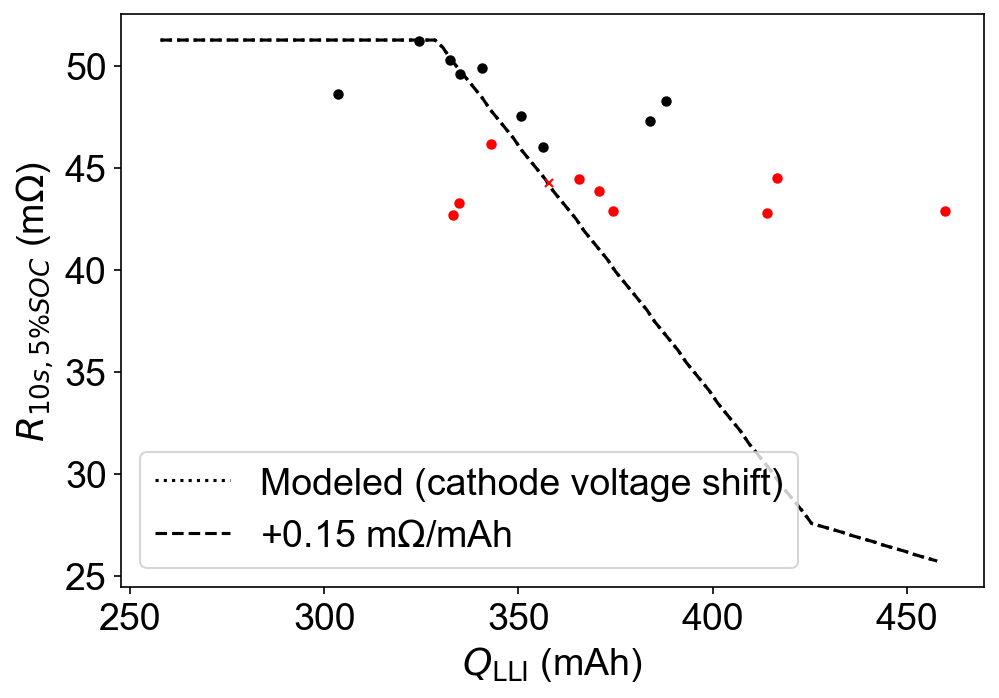

In [15]:
plt.figure()

plt.plot((q_lli_ah_ref + capacity_shift_ah_vec) * 1000, resistance_5_soc_vec * 1000, 
        color='k', linestyle=':', label='Modeled (cathode voltage shift)')

plt.plot((q_lli_ah_ref + capacity_shift_ah_vec) * 1000, resistance_5_soc_vec_w_res_growth * 1000, 
         color='k', linestyle='--', label=f'+{RESISTANCE_GROWTH_RATE} m$\Omega$/mAh')

# Add the Q_LLI calculated for each cell here.
for cellid in cell_dict:
    
    cell = cell_dict[cellid]
    
    if cell.cellid == 9:
        continue
        
    if cell.is_room_temp():
        continue
    
    print(f'Processing cell {cellid}...')
    
    summary_stats_form = cell.get_formation_test_summary_statistics()
    summary_stats_cycling = cell.get_aging_test_summary_statistics()

    q_lli_ah = summary_stats_form['form_first_charge_capacity_ah'] - \
               summary_stats_form['form_final_discharge_capacity_ah']
    
    res_measured = summary_stats_cycling['dcr_10s_5_soc_at_c3']

        
    if cell.cellid == CELL_FAST:
        marker = 'x'
    else:
        marker = 'o'
    
    if cell.is_baseline_formation():
        color = COLOR_BASE
    else:
        color = COLOR_FAST_HT
        
    plt.plot(q_lli_ah * 1000, res_measured * 1000, 
             marker=marker, markersize=4, color=color,
             label='')
    
plt.xlabel('$Q_\mathrm{LLI}$ (mAh)')
plt.ylabel('$R_{10s, 5\% SOC}$ (m$\Omega$)')
plt.legend()